### 1. Make Synthetic Data


In [58]:
# import the packages
from sklearn.datasets import make_classification

In [59]:
# Generate the dataset

X, Y= make_classification(n_samples=1000,n_features=5, n_classes=2, n_redundant=0, random_state=1)

In [64]:
pd.DataFrame(X)



,0,1,2,3,4
0,-0.210801,-1.271874,-0.254311,-0.353635,1.202059
1,0.063762,-0.216813,-0.831148,-0.840287,0.333293
2,1.632531,-1.376652,-0.762185,-2.288838,1.070726
3,1.449072,0.065417,-0.397411,0.591448,0.706335
4,-1.603636,-0.465186,0.011318,0.796493,1.691010
...,...,...,...,...,...
995,-0.861375,0.447175,-0.993981,-0.012037,-1.329708
996,-1.209423,-0.443572,0.815926,-0.025858,2.022576
997,1.474360,0.144510,-1.370430,-0.760725,0.155500
998,-0.549487,-0.168662,0.007560,-1.839101,0.294740


In [65]:
# Examine the dataset

print(X.shape, Y.shape)

(1000, 5) (1000,)


### 2. Spliting the dataset

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.2)

In [68]:
# Examine the data

X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((800, 5), (200, 5), (800,), (200,))

### Building the Classification Models

In [69]:
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import GradientBoostingClassifier,ExtraTreesClassifier,RandomForestClassifier,AdaBoostClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier

In [70]:
# Defining learning classifiers

names=["Nearest_Neighbours", "Linear_SVM", "Polynomial_SVM", "RBF_SVM", "Gaussian_Process", "Gradient_Boosting",
      "Decision_Tree", "Extra_Trees","Random_Forest", "Neural_Net", "AdaBoost", "Naive_Bayes", "QDA", "SGD" ]

classifiers=[
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(kernel="poly", degree=3, C=0.025),
    SVC(kernel="rbf", C=1, gamma=2),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    GradientBoostingClassifier(n_estimators=100, learning_rate=1.0),
    DecisionTreeClassifier(max_depth=5),
    ExtraTreesClassifier(n_estimators=10,min_samples_split=2),
    RandomForestClassifier(max_depth=5, n_estimators=100 ),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(n_estimators=100),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    SGDClassifier(loss="hinge", penalty="l2")
]

### Building Model, Apply Model on Test Data & Record Accuracy score

In [71]:
# iterate over classifiers

scores=[]

for name, clf in zip(names, classifiers):
    clf.fit(X_train, Y_train)
    score=clf.score(X_test, Y_test)
    scores.append(score)

In [72]:
scores

[0.845,
 0.84,
 0.82,
 0.84,
 0.865,
 0.84,
 0.855,
 0.845,
 0.85,
 0.86,
 0.84,
 0.84,
 0.85,
 0.82]

### Analysis of Model Performance

In [73]:
# import library
import seaborn as sns

# creating dataframe for model analysis

df=pd.DataFrame()
df['Name']=names
df['Scores']=scores
df

,Name,Scores
0,Nearest_Neighbours,0.845
1,Linear_SVM,0.840
2,Polynomial_SVM,0.820
3,RBF_SVM,0.840
4,Gaussian_Process,0.865
5,Gradient_Boosting,0.840
6,Decision_Tree,0.855
7,Extra_Trees,0.845
8,Random_Forest,0.850
9,Neural_Net,0.860


### Comparing the models using visualisation

In [74]:
cm=sns.light_palette('green', as_cmap=True)
s=df.style.background_gradient(cmap=cm)
s

,Name,Scores
0,Nearest_Neighbours,0.845000
1,Linear_SVM,0.840000
2,Polynomial_SVM,0.820000
3,RBF_SVM,0.840000
4,Gaussian_Process,0.865000
5,Gradient_Boosting,0.840000
6,Decision_Tree,0.855000
7,Extra_Trees,0.845000
8,Random_Forest,0.850000
9,Neural_Net,0.860000


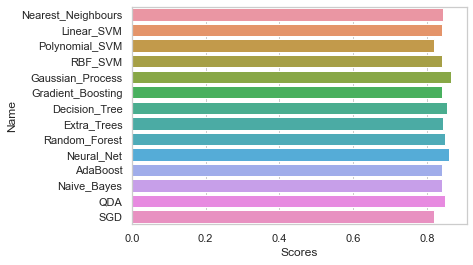

In [75]:
# creating a bar chart
sns.set(style='whitegrid')
ax=sns.barplot(y="Name",x="Scores", data=df)